In [1]:
pip install scikit-posthocs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 25.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 21.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi
import matplotlib.pyplot as plt

# Create a DataFrame with the data
data = {
    'A': [19.119, 17.773, 19.780, 16.841, 18.782],
    'B': [17.200, 16.389, 17.715, 16.367, 16.820],
    'C': [22.692, 23.267, 24.193, 23.162, 23.210],
    'D': [18.927, 17.695, 18.776, 16.824, 18.779],
    'E': [17.199, 16.381, 17.715, 16.367, 16.796]
}

df = pd.DataFrame(data)
df['Groups'] = df.index + 1  # I added a column with group labels
df = pd.melt(df, id_vars='Groups', var_name='Experiment', value_name='Values')

# Friedman test
stat, p_value = friedmanchisquare(*df['Values'].values.reshape(5, -1))
print("Friedman test p-value:", p_value)

Friedman test p-value: 0.0005581683746844981


Nemenyi post hoc p-values:
           1         2         3         4         5
1  1.000000  0.936456  0.998320  0.639392  0.995987
2  0.936456  1.000000  0.817069  0.976078  0.994199
3  0.998320  0.817069  1.000000  0.442142  0.963218
4  0.639392  0.976078  0.442142  1.000000  0.853373
5  0.995987  0.994199  0.963218  0.853373  1.000000


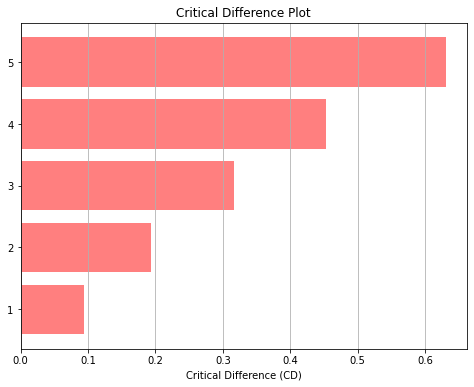

In [11]:
# The p-value=0.0005581683746844981 is less than the significance level (α=0.05)
# so, I will proceed to perform the Nemenyi post hoc test to find significant differences
posthoc = posthoc_nemenyi(df, val_col="Values", group_col="Groups")
print("Nemenyi post hoc p-values:\n", posthoc)

# critical difference (CD) CD = q * sqrt(k(k + 1) / (6N))
# k is the number of groups, and N is the number of samples
k = len(df['Groups'].unique())
N = len(df)
q_values = [0.82, 0.97, 1.12, 1.24, 1.41]

CDs = [q * np.sqrt(k * (k + 1) / (6 * len(df))) for q, k in zip(q_values, range(1, 6))]

# CD plot
plt.figure(figsize=(8, 6))
plt.barh(y=range(len(CDs)), width=CDs, color='r', alpha=0.5)
plt.yticks(range(len(CDs)), df['Groups'].unique())
plt.xlabel("Critical Difference (CD)")
plt.title("Critical Difference Plot")
plt.grid(axis='x')
plt.show()